# ML Project - California housing
*To create a new environment where we install all the python packages necessary for our ML project*

- conda create --name hands_on_ML
- conda activate hands_on_ML
- conda install -c conda-forge scikit-learn
- conda install -c anaconda pandas
- conda install -c conda-forge matplotlib
- conda install -c anaconda seaborn
- pip install ipykernel (--> very important)
- python -m ipykernel install --user --name hands_on_ML --display-name "hands_on_ML"

## California housing market
We have to predict median price of homes in various parts of California
We will use supervised machine learning to predict the median price since we already have values for the target variable.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# pwd --> present working directory, cwd --> current working directory
pwd = os.getcwd()
filepath = os.path.join(pwd,"California_housing.csv")
filepath

'c:\\Users\\DV754TH\\OneDrive - EY\\Desktop\\Practice & Learning\\ML end to end project\\California_housing.csv'

In [4]:
df_housing = pd.read_csv(filepath) # df_housing = housing_data
df_housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df_housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

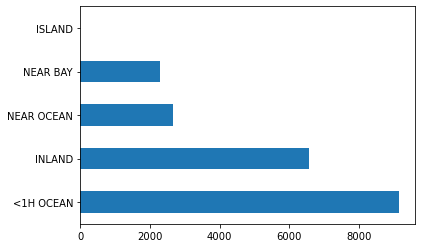

In [7]:
df_housing['ocean_proximity'].value_counts().plot(kind='barh')

In [8]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


<AxesSubplot:>

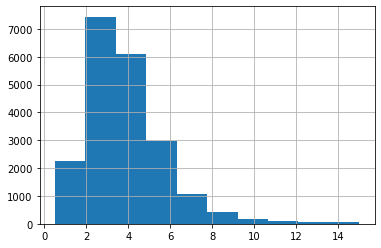

In [9]:
# Median income is an important factor that determines the price of homes
df_housing['median_income'].hist()

In [10]:
# Lets bin the above data for better visualization
# Create a new column 'Income_category'
# np.inf means infinity
df_housing['income_category'] = pd.cut(df_housing['median_income'],
                                        bins=[0., 1.5, 3., 4.5, 6., np.inf],
                                        labels=[1,2,3,4,5])
df_housing['income_category'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_category, dtype: int64

<AxesSubplot:>

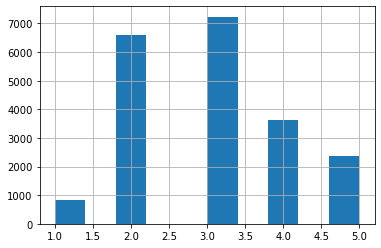

In [11]:
df_housing['income_category'].hist()

In [12]:
df_housing['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

### **Define target and predictor variables**

In [13]:
y = df_housing['median_house_value']
X = df_housing.drop('median_house_value',axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


### **Split the data set**

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category
16967,-122.31,37.54,49.0,1340.0,281.0,660.0,284.0,4.1630,NEAR OCEAN,3
5305,-118.46,34.07,42.0,2564.0,460.0,913.0,414.0,9.2225,<1H OCEAN,5
6961,-118.04,33.99,36.0,3531.0,754.0,1613.0,697.0,3.2359,<1H OCEAN,3
5725,-118.22,34.19,36.0,959.0,204.0,446.0,210.0,3.2150,<1H OCEAN,3
19969,-119.09,36.21,38.0,1901.0,453.0,1613.0,400.0,1.8828,INLAND,2
...,...,...,...,...,...,...,...,...,...,...
13653,-117.33,34.03,14.0,1582.0,347.0,825.0,259.0,2.8281,INLAND,2
8803,-118.40,33.78,26.0,5005.0,776.0,2357.0,790.0,8.5421,NEAR OCEAN,5
16987,-122.26,37.55,17.0,1321.0,425.0,683.0,408.0,4.7045,NEAR BAY,4
2379,-119.55,36.72,6.0,1186.0,234.0,1135.0,218.0,2.1515,INLAND,2


#### We have to check if the values in the training set is equally distributed as in the testing set for accurate predictions. We do this with the median income category as it is an important predictor.

<AxesSubplot:>

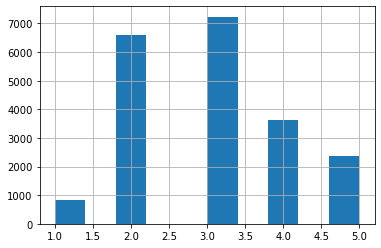

In [17]:
df_housing['income_category'].hist()

<AxesSubplot:>

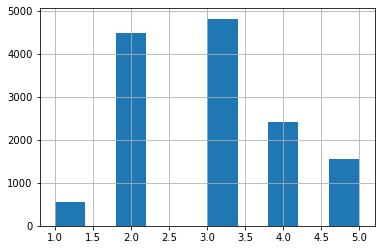

In [18]:
X_train['income_category'].hist()

#### Although the above visuals indicate equal distribution of data between training and testing set, we can also use Stratified split to ensure this.

### **Stratified split**

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

# The below block of code will split the data based on income category evenly between training and testing set
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)

for train_index, test_index in split.split(df_housing, df_housing['income_category']):
   strat_train_set = df_housing.loc[train_index]
   strat_test_set = df_housing.loc[test_index]

In [20]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636,88300.0,INLAND,2
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811,162500.0,<1H OCEAN,2
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861,95100.0,<1H OCEAN,1
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444,183900.0,<1H OCEAN,3
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590,341900.0,<1H OCEAN,5
...,...,...,...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864,200200.0,INLAND,3
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038,308300.0,<1H OCEAN,3
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611,344200.0,<1H OCEAN,3
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543,253800.0,NEAR OCEAN,3


#### To verify the even distribution of data b/w train & test set, we have to compare the strat test set with the entire df_housing data set 

In [21]:
# len() gives the no of entries or rows in the dataset
strat_test_set['income_category'].value_counts() / len(strat_test_set)

3    0.350558
2    0.318849
4    0.176307
5    0.114504
1    0.039783
Name: income_category, dtype: float64

In [22]:
# We observe that for the same categories, we are getting the same distribution of values
df_housing['income_category'].value_counts() / len(df_housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_category, dtype: float64

In [23]:
# We don't require income category anymore
strat_test_set.drop('income_category', axis='columns', inplace=True)
strat_train_set.drop('income_category', axis='columns', inplace=True)

#### Visualizing data is very important because some datasets might have the same mean, medain and mode, but are completely different. 

### **Visualizing data**

In [24]:
housing = strat_train_set.copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636,88300.0,INLAND
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811,162500.0,<1H OCEAN
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861,95100.0,<1H OCEAN
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444,183900.0,<1H OCEAN
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590,341900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864,200200.0,INLAND
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038,308300.0,<1H OCEAN
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611,344200.0,<1H OCEAN
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543,253800.0,NEAR OCEAN


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

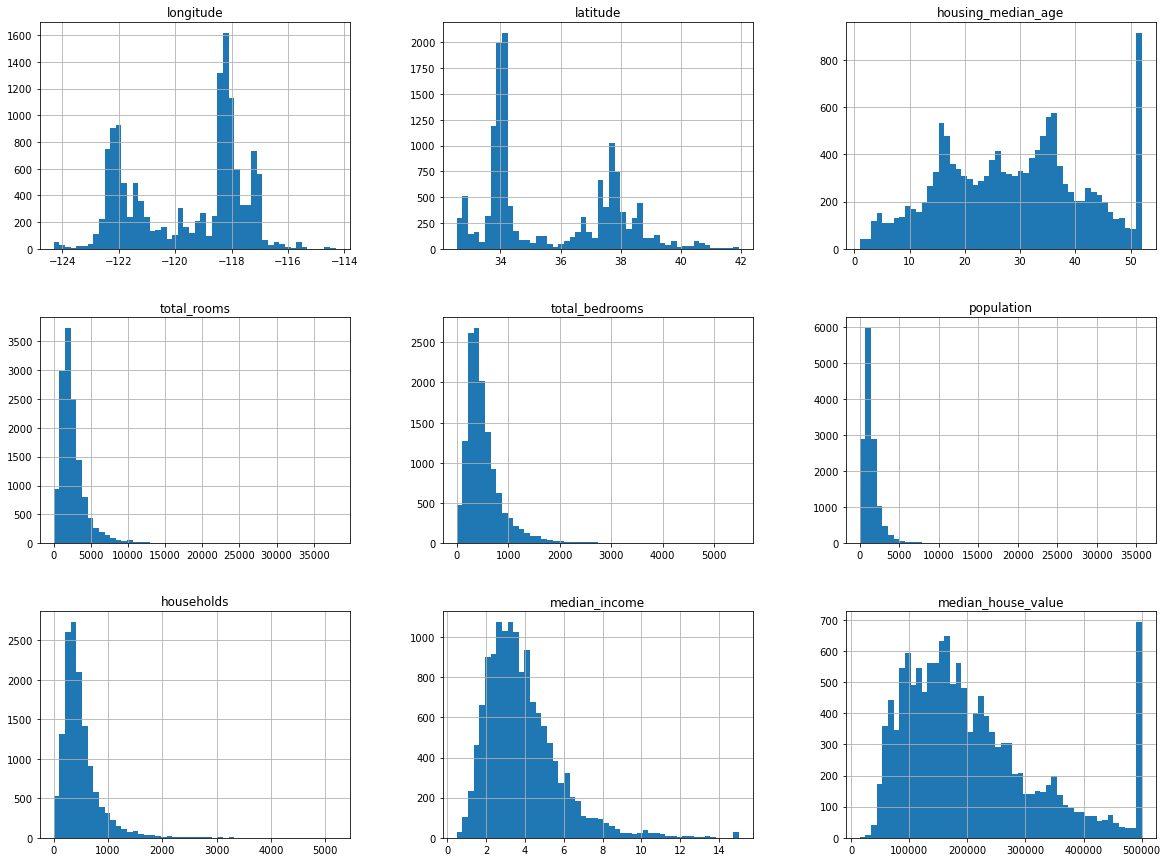

In [25]:
housing.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

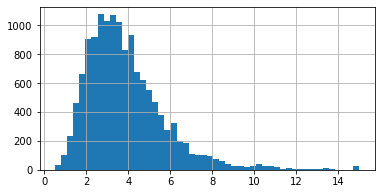

In [26]:
housing['median_income'].hist(bins=50, figsize=(6,3))

## Geographic data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

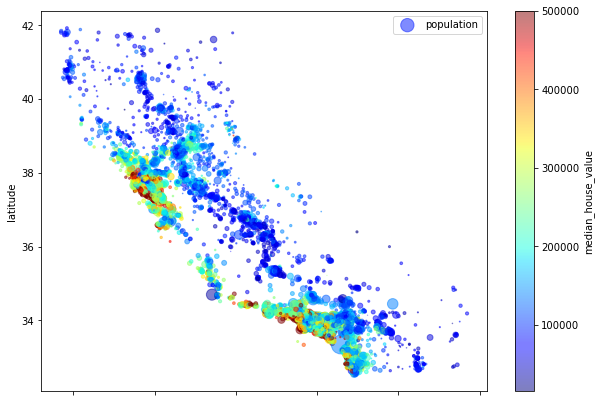

In [27]:
# The keyword c may be given as the name of a column to provide colors for each point
# The keyword s is the bubble size
# cmap is a colormap for representing data points with different colors and is used only with keyword c
# jet is the name of a color bar

housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap("jet"), colorbar=True)

### **Correlation Matrices**

In [28]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924425,-0.111518,0.052286,0.080533,0.109645,0.066610,-0.023741,-0.052886
latitude,-0.924425,1.000000,0.009539,-0.043430,-0.077287,-0.117782,-0.082241,-0.072663,-0.138196
housing_median_age,-0.111518,0.009539,1.000000,-0.362466,-0.322497,-0.296318,-0.303120,-0.112059,0.117018
total_rooms,0.052286,-0.043430,-0.362466,1.000000,0.929572,0.852793,0.918067,0.200348,0.135076
total_bedrooms,0.080533,-0.077287,-0.322497,0.929572,1.000000,0.874190,0.979507,-0.009781,0.047784
population,0.109645,-0.117782,-0.296318,0.852793,0.874190,1.000000,0.903072,0.002803,-0.025524
households,0.066610,-0.082241,-0.303120,0.918067,0.979507,0.903072,1.000000,0.011902,0.064619
median_income,-0.023741,-0.072663,-0.112059,0.200348,-0.009781,0.002803,0.011902,1.000000,0.688935
median_house_value,-0.052886,-0.138196,0.117018,0.135076,0.047784,-0.025524,0.064619,0.688935,1.000000


<AxesSubplot:>

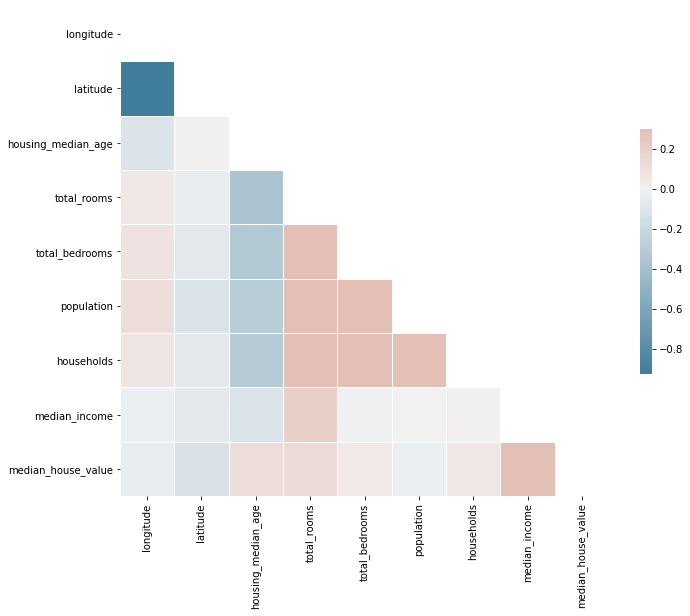

In [29]:
# Visualize the above matrix
# np.triu(x) gives upper traingular matrix same shape and datatype as of x
# np.ones_like(x) returns an array of ones with same shape and datatype as of x
# plt.suplots() will return a figure(f) and a single axis(ax)
# sns.diverging_palette(s,l,as_cmap) --> s - anchor saturation, l - anchor lightness for both extents of the map
# If as_cmap = True - returns a color map 
# cbar_kws is for color bar
# mask = mask data will not be shown in cells where mask is True. Cells with missing values are automatically masked

corr = housing.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230,20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

### **Preparing data**

In [30]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Dealing with missing values

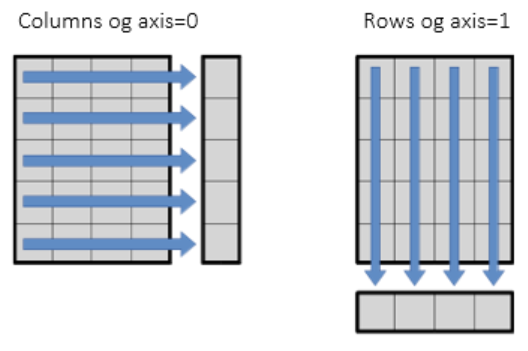

In [31]:
from IPython.display import Image
Image(filename='Axis.png',width=500, height=300) 

In [32]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]  
# The code/condition within df[-"-] will show rows that have NaN values, while the df with the condition will give 
# the section of df with NaN values as a new df 
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,NEAR OCEAN
11741,-121.13,38.87,48.0,1127.0,NaN,530.0,186.0,3.0917,INLAND
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,NEAR BAY
5222,-118.25,33.95,28.0,2136.0,NaN,1799.0,476.0,1.5427,<1H OCEAN
4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN
16880,-122.39,37.59,32.0,4497.0,NaN,1846.0,715.0,6.1323,NEAR OCEAN
15137,-116.91,32.83,16.0,5203.0,NaN,2515.0,862.0,4.1050,<1H OCEAN
6220,-117.91,34.05,35.0,3189.0,NaN,1727.0,500.0,5.0758,<1H OCEAN


In [33]:
# Get ride of rows with missing values
sample_incomplete_rows.dropna(subset=['total_bedrooms'])
# gets rid of the rows where total_bedrooms is NaN

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [34]:
# Get rid of the total bedrooms column
sample_incomplete_rows.drop("total_bedrooms",axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
2578,-124.06,40.86,34.0,4183.0,1891.0,669.0,3.2216,NEAR OCEAN
11741,-121.13,38.87,48.0,1127.0,530.0,186.0,3.0917,INLAND
290,-122.16,37.77,47.0,1256.0,570.0,218.0,4.3750,NEAR BAY
5222,-118.25,33.95,28.0,2136.0,1799.0,476.0,1.5427,<1H OCEAN
4591,-118.28,34.06,42.0,2472.0,3795.0,1179.0,1.2254,<1H OCEAN
...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,1886.0,769.0,2.6036,<1H OCEAN
16880,-122.39,37.59,32.0,4497.0,1846.0,715.0,6.1323,NEAR OCEAN
15137,-116.91,32.83,16.0,5203.0,2515.0,862.0,4.1050,<1H OCEAN
6220,-117.91,34.05,35.0,3189.0,1727.0,500.0,5.0758,<1H OCEAN


In [38]:
# Impute the missing values with the median value
median = housing['total_bedrooms'].median()
sample_incomplete_rows = sample_incomplete_rows.copy()
sample_incomplete_rows['total_bedrooms'].fillna(median,inplace = True)
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2578,-124.06,40.86,34.0,4183.0,429.5,1891.0,669.0,3.2216,NEAR OCEAN
11741,-121.13,38.87,48.0,1127.0,429.5,530.0,186.0,3.0917,INLAND
290,-122.16,37.77,47.0,1256.0,429.5,570.0,218.0,4.3750,NEAR BAY
5222,-118.25,33.95,28.0,2136.0,429.5,1799.0,476.0,1.5427,<1H OCEAN
4591,-118.28,34.06,42.0,2472.0,429.5,3795.0,1179.0,1.2254,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,429.5,1886.0,769.0,2.6036,<1H OCEAN
16880,-122.39,37.59,32.0,4497.0,429.5,1846.0,715.0,6.1323,NEAR OCEAN
15137,-116.91,32.83,16.0,5203.0,429.5,2515.0,862.0,4.1050,<1H OCEAN
6220,-117.91,34.05,35.0,3189.0,429.5,1727.0,500.0,5.0758,<1H OCEAN


In [33]:
# Impute median values where ever there is NaN values in the data set
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [34]:
# Get only numerical columns
housing_num = housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590
...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543


In [35]:
# The imputer object will be fit/trained on the housing_num data set.
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [36]:
# Transform the data set by imputing the missing values with the median value
# X gives an array, difficult to read
X = imputer.transform(housing_num)
X

array([[-1.1763e+02,  3.4060e+01,  3.9000e+01, ...,  1.2940e+03,
         3.0300e+02,  2.3636e+00],
       [-1.1896e+02,  3.4190e+01,  1.6000e+01, ...,  5.8700e+02,
         2.9600e+02,  1.9811e+00],
       [-1.1823e+02,  3.3930e+01,  2.3000e+01, ...,  6.1000e+02,
         1.2600e+02,  1.4861e+00],
       ...,
       [-1.1842e+02,  3.4010e+01,  2.9000e+01, ...,  9.6000e+02,
         4.4900e+02,  3.6611e+00],
       [-1.2192e+02,  3.6610e+01,  2.9000e+01, ...,  1.8730e+03,
         7.5700e+02,  3.1543e+00],
       [-1.2121e+02,  3.8760e+01,  1.6000e+01, ...,  7.9200e+02,
         2.8600e+02,  3.1583e+00]])

In [37]:
# Transform X into a data set
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590
...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543


In [38]:
imputer.strategy

'median'

## Encode Categorical variables

Ordinal Encoder - is used to encode categorical variables when one variable is better than the other. Ex: great > good > neutral

In [39]:
housing_cat = housing[["ocean_proximity"]]   # df[[]] --> gives the column as a df
housing_cat.head()

,ocean_proximity
13325,INLAND
20355,<1H OCEAN
7481,<1H OCEAN
15465,<1H OCEAN
18116,<1H OCEAN


In [40]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[0:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [4.],
       [0.],
       [1.],
       [0.]])

In [41]:
# Instead we will use OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False) # False to return an array, else returns a sparse matrix
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot # Creates a dense array i.e., all instances have a value, not just the ones that are encoded

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [42]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Feature Engineering

Feature engineering uses domain knowledge to create new features (columns) using raw data

In [43]:
def feature_engineering(data):
    data['bedrooms_per_household'] = data['total_bedrooms']/data['households']
    data['population_per_household'] = data['population']/data['households']
    data['rooms_per_household'] = data['total_rooms']/data['households']

    return data

In [44]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
13325,-117.63,34.06,39.0,1210.0,310.0,1294.0,303.0,2.3636,1.023102,4.270627,3.993399
20355,-118.96,34.19,16.0,1807.0,346.0,587.0,296.0,1.9811,1.168919,1.983108,6.104730
7481,-118.23,33.93,23.0,545.0,131.0,610.0,126.0,1.4861,1.039683,4.841270,4.325397
15465,-117.22,33.18,13.0,4273.0,886.0,2328.0,801.0,3.3444,1.106117,2.906367,5.334582
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590,1.018634,2.804348,6.627329
...,...,...,...,...,...,...,...,...,...,...,...
994,-121.73,37.71,12.0,5608.0,1049.0,2595.0,1067.0,3.9864,0.983130,2.432052,5.255858
5377,-118.39,34.04,49.0,1230.0,279.0,669.0,269.0,3.9038,1.037175,2.486989,4.572491
5448,-118.42,34.01,29.0,1996.0,489.0,960.0,449.0,3.6611,1.089087,2.138085,4.445434
9813,-121.92,36.61,29.0,3735.0,808.0,1873.0,757.0,3.1543,1.067371,2.474240,4.933950


## Scale our data

We have to scale our data to cope for large differences between numbers from different columns 

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[ 0.97214485, -0.73940276,  0.81321472, ..., -0.15477506,
         0.11294847, -0.59541575],
       [ 0.30675114, -0.6783732 , -1.01770862, ...,  0.14740985,
        -0.09912619,  0.27582913],
       [ 0.67196724, -0.80043233, -0.46047108, ..., -0.12041481,
         0.16585245, -0.4584163 ],
       ...,
       [ 0.57691099, -0.76287567,  0.01716109, ..., -0.01803113,
        -0.0847584 , -0.40888259],
       [-1.17412507,  0.45771563,  0.01716109, ..., -0.06303385,
        -0.05359357, -0.20729565],
       [-0.8189149 ,  1.46705074, -1.01770862, ..., -0.13019119,
        -0.02624518,  0.07678552]])

### **Pipelines**

Pipelines are features built into sklearnthat allow us to easily apply a number of transformations one after the other. We can also create our own pipeline function 

In [46]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):
    
    ### Separate labels if they exist ### Labels = test set

    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
    else:
        labels = None
    
    ### Feature engineering ###

    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns)

    ### Imputing data ###
    
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical data ###

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)  
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity")    # We are encoding this variable, hence not required in our list

    ### Scaling numerical data ###

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    housing_scaled = scaler.fit_transform(imputed)

    ### Concatenate all the data ###

    output = np.hstack([housing_scaled,housing_cat_1hot])

    return output, labels, features

## Select and Train the model

In [47]:
train_data, train_labels, features = data_transformations(strat_train_set)
train_data

array([[ 0.97214485, -0.73940276,  0.81321472, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30675114, -0.6783732 , -1.01770862, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.67196724, -0.80043233, -0.46047108, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.57691099, -0.76287567,  0.01716109, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17412507,  0.45771563,  0.01716109, ...,  0.        ,
         0.        ,  1.        ],
       [-0.8189149 ,  1.46705074, -1.01770862, ...,  0.        ,
         0.        ,  0.        ]])

In [48]:
test_data, test_labels, features = data_transformations(strat_test_set)
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'bedrooms_per_household',
 'population_per_household',
 'rooms_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

## Linear regression

In [49]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)   # LR model will find out how train_data relates to train_labels

LinearRegression()

In [50]:
# Compare against some test data
original_values = test_labels[0:5]   # 
predicted_values = lin_reg.predict(test_data[0:5])   # use 1st 5 rows of test_data as imput to predict values that look like test_labels[0:5] 

comparison_dataframe = pd.DataFrame(data={'Original values':original_values,'Predicted values':predicted_values})
comparison_dataframe['Differences'] = comparison_dataframe['Original values'] - comparison_dataframe['Predicted values']

comparison_dataframe

,Original values,Predicted values,Differences
6770,469100.0,379600.288363,89499.711637
18823,43500.0,17211.877451,26288.122549
7674,171100.0,242051.359756,-70951.359756
15312,106300.0,148613.375081,-42313.375081
3607,169400.0,147627.303451,21772.696549


In [51]:
# Use metrics to evaluate the model
from sklearn.metrics import mean_squared_error

# mse = mean squred error ; rmse = root mean squared error
lin_mse = mean_squared_error(original_values,predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

56568.24417862148

In [52]:
# Use metrics to evaluate the model
from sklearn.metrics import mean_absolute_error

# mae = mean absolute error
lin_mae = mean_absolute_error(original_values,predicted_values)
lin_mae

50165.05311447864

*The errors are too large to consider the above linear model. Therefore we have to use a different algorithms to predict house values*

## Decision Tree Regressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

# At what random state is the computer going to start at? Without random state, the model will give me a different result everytime we run it
tree_reg = DecisionTreeRegressor(random_state=42)   
tree_reg.fit(train_data,train_labels)

DecisionTreeRegressor(random_state=42)

In [54]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels,train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

*Zero error indicates that we might have overfit our data, we have to cross validate our model by using K-fold cross validation 
where our data is split into 10 folds, out of which 9 folds are used for training and 1 fold is used for testing. All 10 folds are 
trained and tested in all permutation and combination. This way we can rigorously evaluate our model and obatin a less accurate but 
slightly under fitted data. Suitable for smaller datasets*

## Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels, scoring='neg_mean_squared_error',cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [56]:
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Stdev:',scores.std())

display_scores(tree_rmse_scores)

Scores: [76220.52260375 68958.45984352 72963.6967282  72639.3823428
 71381.29257966 74592.82178362 72422.76033075 71934.93159686
 71105.00488616 74148.44095553]
Mean: 72636.73136508498
Stdev: 1924.8981553529243


## Random forest regressor
*Runs a group of decision tree regressors one after the other*

In [58]:
from sklearn.ensemble import RandomForestRegressor

# At what random state is the computer going to start at? Without random state, the model will give me a different result everytime we run it
forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)   
forest_reg.fit(train_data,train_labels)

RandomForestRegressor(random_state=42)

In [60]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels,train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18867.60548290274

In [61]:
# Run cross validation
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data, train_labels, scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52491.05877457 48585.49509227 50880.13559337 53157.88969061
 49470.96845553 52781.51394667 51589.72789233 49360.53318538
 49915.26775004 49996.89953999]
Mean: 50822.94899207534
Stdev: 1521.2064105122688


*We have got a better prediction with Random forest regressor model*

## Fine tuning the model
*After we pick a set of models that are promising, we will have to fine tune the hyperparameters (Basically, anything in machine learning and deep learning that you decide their values or choose their configuration before training begins and whose values or configuration will remain the same when training ends is a hyperparameter, which are used to control the learning process) in order to find the best ones to use for our model. We can use grid search to accomplish this*

### Grid search

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # Try 12 (3*4) combinations of hyperparameters
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    # Try 6 (2*3) combinations with bootstrap set as False
    {'bootstrap': [False],'n_estimators': [3,10], 'max_features': [2,3,4]}
]

forest_reg = RandomForestRegressor(random_state=42)
# Train across 5 folds, that's total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_data,train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
# Best parameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [65]:
# Best estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [66]:
# now we have to cross validate our grid_search results
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

65812.86328325889 {'max_features': 2, 'n_estimators': 3}
56182.58728317135 {'max_features': 2, 'n_estimators': 10}
54022.0953854141 {'max_features': 2, 'n_estimators': 30}
62198.571829149245 {'max_features': 4, 'n_estimators': 3}
53508.92715929003 {'max_features': 4, 'n_estimators': 10}
50872.52067402393 {'max_features': 4, 'n_estimators': 30}
58310.767455230314 {'max_features': 6, 'n_estimators': 3}
52338.21490907741 {'max_features': 6, 'n_estimators': 10}
50395.23355010334 {'max_features': 6, 'n_estimators': 30}
58954.75357311551 {'max_features': 8, 'n_estimators': 3}
52702.9504927101 {'max_features': 8, 'n_estimators': 10}
50426.94529947769 {'max_features': 8, 'n_estimators': 30}
63673.48769755632 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54852.69359013511 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59739.303568003175 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52802.21867042155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [68]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.067284,0.023681,0.003931,0.002031,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.037016e+09,-4.550480e+09,...,-4.331333e+09,2.016197e+08,18,-1.131347e+09,-1.196735e+09,-1.127395e+09,-1.199818e+09,-1.161183e+09,-1.163296e+09,3.087447e+07
1,0.189740,0.026217,0.012946,0.007570,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.114622e+09,-3.303163e+09,...,-3.156483e+09,8.944773e+07,11,-5.947299e+08,-6.057897e+08,-6.016766e+08,-6.094405e+08,-6.044697e+08,-6.032213e+08,4.925925e+06
2,0.559276,0.035517,0.025201,0.002780,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.936608e+09,-3.029203e+09,...,-2.918387e+09,9.554719e+07,9,-4.421246e+08,-4.393238e+08,-4.398022e+08,-4.568083e+08,-4.512768e+08,-4.458671e+08,6.965341e+06
3,0.085406,0.001224,0.003347,0.000433,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.686246e+09,-4.192267e+09,...,-3.868662e+09,1.731616e+08,16,-1.053681e+09,-1.066069e+09,-9.614511e+08,-9.630280e+08,-1.016512e+09,-1.012148e+09,4.389643e+07
4,0.292516,0.018170,0.010565,0.002071,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.746784e+09,-3.044793e+09,...,-2.863205e+09,1.074082e+08,8,-5.589166e+08,-5.294790e+08,-5.103660e+08,-5.263246e+08,-5.276391e+08,-5.305450e+08,1.574503e+07


### Randomized search
*Easily finds the hyperparameters we are interested in by randomly picking a couple of hyperparameters and tries them out instead of searching through all possible combinations like the above method which might take a lot of time*

In [69]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
                  'n_estimators': randint(low=1,high=200),
                  'max_features': randint(low=1,high=8)
                  } 

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5, 
                                scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A81DAF8760>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A82A278A60>},
                   random_state=42, scoring='neg_mean_squared_error')

In [70]:
# now we have to cross validate our rnd_search results
cvres = rnd_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

49333.670685930476 {'max_features': 7, 'n_estimators': 180}
51882.97725092602 {'max_features': 5, 'n_estimators': 15}
51066.614670491406 {'max_features': 3, 'n_estimators': 72}
51379.91074126285 {'max_features': 5, 'n_estimators': 21}
49455.88075545604 {'max_features': 7, 'n_estimators': 122}
51024.140690855005 {'max_features': 3, 'n_estimators': 75}
50907.12436997828 {'max_features': 3, 'n_estimators': 88}
49863.12287435522 {'max_features': 5, 'n_estimators': 100}
50663.67065391902 {'max_features': 3, 'n_estimators': 150}
66796.29070887188 {'max_features': 5, 'n_estimators': 2}


In [71]:
# List the most important features from all the available columns
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.36076116e-02, 6.70484278e-02, 4.04028688e-02, 1.90334964e-02,
       1.67325091e-02, 1.82647266e-02, 1.63843202e-02, 3.37565531e-01,
       2.51151004e-02, 1.09405543e-01, 9.26936087e-02, 2.27961321e-02,
       1.34899045e-01, 1.16252651e-04, 6.39469576e-03, 9.54013116e-03])

# Feature importance list
*This is crucial especially when our models become black box models*

In [72]:
feature_importance_list = list(zip(features, feature_importances.tolist())) # features from the preprocessing pipeline
feature_importance_list

[('longitude', 0.0836076116332615),
 ('latitude', 0.06704842776748451),
 ('housing_median_age', 0.04040286876672789),
 ('total_rooms', 0.0190334963641117),
 ('total_bedrooms', 0.016732509127044635),
 ('population', 0.018264726584631706),
 ('households', 0.016384320170851452),
 ('median_income', 0.33756553126426975),
 ('bedrooms_per_household', 0.025115100371163743),
 ('population_per_household', 0.10940554292806923),
 ('rooms_per_household', 0.09269360869036111),
 ('<1H OCEAN', 0.022796132139005144),
 ('INLAND', 0.13489904461758895),
 ('ISLAND', 0.00011625265054338644),
 ('NEAR BAY', 0.006394695764912665),
 ('NEAR OCEAN', 0.009540131159972633)]

<BarContainer object of 16 artists>

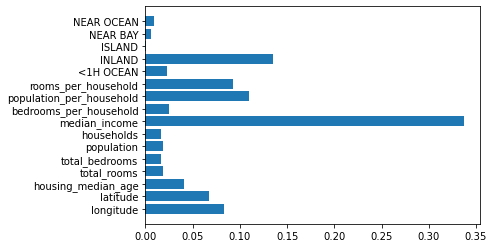

In [73]:
plt.barh(y=features,width=feature_importances.tolist())

It is clear that the median income along with inland, rooms/house, population/house, latitude & longitude features are the most important ones

In [74]:
# Now we have to make the final predictions
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(test_data)
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [75]:
final_rmse

50556.80017583786